In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/Fatema/Sprint-4-Project/vehicles_us.csv')

In [3]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


From the table above we can make the following conclusions:

The minimum value of the price variable is 1, so there is probably an error that should be fixed;
In the is_4wd variable there is only one value category = '1.0'. It confirms our hypothesis that it's actually a binary feature, where '1' is 'True' and '0' is 'False'. All the missing values should therefore be replaced with '0';
For the price variable we see that the mean is higher than the median value suggesting that the distribution has a long tail of large values.

In [6]:
#popularity of vehicles by Brand
df['model'].value_counts().head()

model
ford f-150                  2796
chevrolet silverado 1500    2171
ram 1500                    1750
chevrolet silverado         1271
jeep wrangler               1119
Name: count, dtype: int64

We see that the first word in the model name is the car brand. Let's create a function that will extract the brand name.

In [7]:
def brand(row):
    """
    Takes in a vehicle's model and returns its brand
    """
    
    model = row['model']
    model_split = model.split(' ')
    brand = model_split[0]
    return brand

In [8]:
df['brand'] = df.apply(brand, axis=1)
df['brand'].value_counts()

brand
ford             12672
chevrolet        10611
toyota            5445
honda             3485
ram               3316
jeep              3281
nissan            3208
gmc               2378
subaru            1272
dodge             1255
hyundai           1173
volkswagen         869
chrysler           838
kia                585
cadillac           322
buick              271
bmw                267
acura              236
mercedes-benz       41
Name: count, dtype: int64

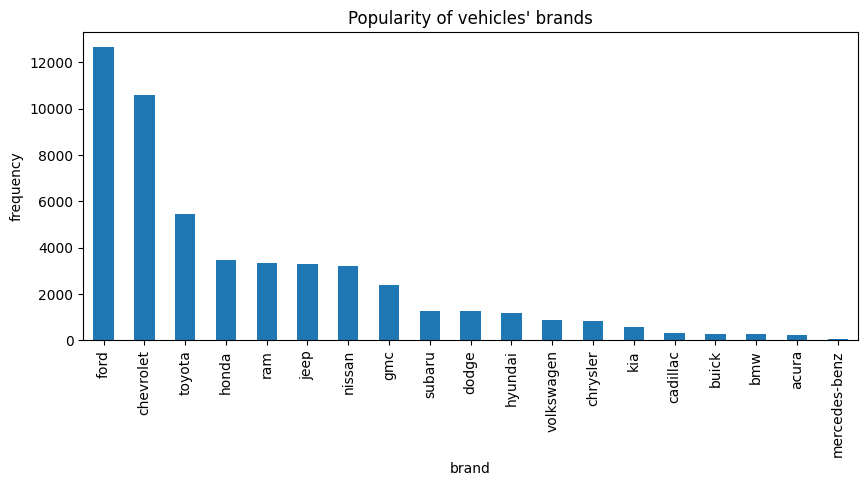

In [9]:
df['brand'].value_counts().plot(kind='bar', figsize=(10,4))
plt.title("Popularity of vehicles' brands")
plt.xlabel('brand')
plt.ylabel('frequency');

Ford, Chevrolet and Toyota are the most popular brands in this dataset. Mercedes-benz is the least popular brand in this dataset, probably because it's a luxury brand, so not as many people are able to afford it, compared to Ford, for instance.

In [10]:
#Missing Values
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
brand               0
dtype: int64

In [11]:
df[df['odometer'] == 0].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,brand
352,7997,2009.0,gmc yukon,excellent,8.0,gas,0.0,automatic,SUV,white,1.0,2019-03-16,88,gmc
814,2995,1999.0,ford f-150,good,6.0,gas,0.0,manual,truck,NaN,NaN,2019-03-14,16,ford
1375,5888,NaN,toyota 4runner,good,6.0,gas,0.0,automatic,SUV,black,NaN,2019-02-22,36,toyota
1461,1000,1992.0,gmc sierra 1500,good,8.0,gas,0.0,automatic,truck,NaN,NaN,2018-09-28,47,gmc
1970,10988,2000.0,ford f-250 sd,good,8.0,diesel,0.0,automatic,truck,white,1.0,2018-11-21,39,ford
2049,30000,1969.0,chevrolet corvette,excellent,8.0,other,0.0,automatic,convertible,white,NaN,2018-08-01,20,chevrolet
2077,11888,2010.0,chevrolet silverado 1500,good,8.0,gas,0.0,automatic,truck,white,NaN,2018-07-02,24,chevrolet
2506,3000,2006.0,honda civic,good,NaN,gas,0.0,automatic,sedan,silver,NaN,2018-06-02,37,honda
3640,4200,NaN,nissan murano,good,6.0,gas,0.0,automatic,SUV,red,1.0,2018-08-24,21,nissan
4186,11888,2010.0,chevrolet silverado 1500,good,8.0,gas,0.0,automatic,truck,white,NaN,2018-12-06,71,chevrolet


Based on these vehicle's model year, we can see that they are not new cars, the condition is sometimes only 'fair', so we will assume that the 0 value in the odometer column is also an error. We will replace it with 'NaN' and then fill all the 'NaN' values with the median based on grouping by model and type.

In [12]:
df.loc[df['odometer'] == 0, 'odometer'] = np.nan


In [13]:
df['odometer'] = df.groupby(['model', 'type'])['odometer'].transform(lambda x: x.fillna(x.median()))


/Users/Fatema/Sprint-4-Project/my_venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/Fatema/Sprint-4-Project/my_venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/Fatema/Sprint-4-Project/my_venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/Fatema/Sprint-4-Project/my_venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/Fatema/Sprint-4-Project/my_venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/Fatema/Sprint-4-Project/my_v

In [14]:
df['odometer'].isnull().sum()

57

These 57 observations are unique in this data set (only 1 row with the model and type combination), so for them we don't have proper medians to fill in the odometer column. We are forced to exclude them from the data frame.

In [15]:
df = df.dropna(subset=['odometer'], axis=0)
df.reset_index(drop=True, inplace=True)
df['odometer'].isnull().sum()


0

Model_year
First, we will find a median value in odometer column per year for each model and type. For missing model_year values we divide odometer value by median odometer per year value. It gives the number of years in exploitation. Then subtracting from the posting year the number of exploitation years gives us the missing model_year value.

Let's create a column year_posted first. For that we'll need to convert date_posted to datetime format.

In [16]:
df['date_posted']= pd.to_datetime(df['date_posted'])
df['year_posted'] = df['date_posted'].dt.year

In [17]:
#Next, we'll subtract model_year from year_posted.

df['exploitation_years'] = df['year_posted'] - df['model_year']

In [18]:
#Now let's calculate odometer per year value for each observation.

df['odometer_per_year'] = df['odometer'] / df['exploitation_years']

In [19]:
#Next step is to find a median odometer_per_year value for each type and model combination.

odometer_per_year_dict = df.groupby(['model','type'])['odometer_per_year'].median().to_dict()

For each row where model_year is NaN, we will take odometer value and divide it by median odometer_per_year for this model and type combination and save this value in the exploitation_years column, then subtract exploitation_years from the year-posted column and save this value to the model_year column.

In [20]:
def fill_in_model_year(row):
    """
    Takes in a row and if the model_year of this row is NaN, takes `odometer` value and 
    divides it by median `odometer_per_year` for this model and type combination 
    and saves this value in the `exploitation_years` column, 
    then subtracts `exploitation_years` from the `year-posted` column and saves this value to the `model_year` column. 
    """
    if np.isnan(row['model_year']):
        row['exploitation_years'] = row['odometer'] / odometer_per_year_dict[(row['model'], row['type'])]
        row['model_year'] = row['year_posted'] - row['exploitation_years']
    return row
df = df.apply(fill_in_model_year, axis=1)
df['model_year'].isnull().sum()

9

These 9 observations are unique in this data set (only 1 row with the model and type combination), so for them we don't have proper medians to fill in the model_year column. We are forced to exclude them from the data frame.

In [21]:
df = df.dropna(subset=['model_year'], axis=0)
df.reset_index(drop=True, inplace=True)
df['model_year'].isnull().sum()

0

In [22]:
#Finally, let's change the data type to integer.
df['model_year'] = df['model_year'].astype('int')

#We don't need the odometer_per_year and exploitation_years columns anymore, so let's remove them.
df = df.drop(['odometer_per_year','exploitation_years'], axis=1)
df.reset_index(drop=True, inplace=True)


Cylinders
Missing cylinders values will be filled with the median value of a respective group based on the model and type of a vehicle. We assume that cars with the same model (e.g. cadillac escalade) but different types (e.g. SUV and pickup) have different number of cylinders because their engines were designed for different purposes.



In [23]:
df['cylinders'] = df.groupby(['model', 'type'])['cylinders'].transform(lambda x: x.fillna(x.median()))
df['cylinders'].isnull().sum()

/Users/Fatema/Sprint-4-Project/my_venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/Fatema/Sprint-4-Project/my_venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/Fatema/Sprint-4-Project/my_venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/Fatema/Sprint-4-Project/my_venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/Fatema/Sprint-4-Project/my_venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/Fatema/Sprint-4-Project/my_v

13

These 13 observations are unique in this data set (only 1 row with the model and type combination), so for them we don't have proper medians to fill in the cylinders column. We are forced to exclude them from the data frame.



In [24]:
df = df.dropna(subset=['cylinders'], axis=0)
df.reset_index(drop=True, inplace=True)
df['cylinders'].isnull().sum()

0

In [25]:
#Paint color
df['paint_color'].value_counts()

paint_color
white     10023
black      7653
silver     6240
grey       5031
blue       4472
red        4415
green      1393
brown      1223
custom     1153
yellow      254
orange      231
purple      102
Name: count, dtype: int64

In [26]:
df['paint_color'] = df['paint_color'].fillna('missing')


In [27]:
df.isnull().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
type                0
paint_color         0
is_4wd          25884
date_posted         0
days_listed         0
brand               0
year_posted         0
dtype: int64

All the missing values have been filled.

In [28]:
#Age of a vehicle when the ad was placed
df['month_posted'] = df['date_posted'].dt.month
df['dow_posted'] = df['date_posted'].dt.dayofweek



In [29]:
df['age_in_years'] = (df['date_posted'] - pd.to_datetime(df['model_year'], format='%Y')) / np.timedelta64(1, 'D') / 365.25

In [30]:
fig = px.histogram(df, x="age_in_years")
fig.show()

In [31]:
print('{:0.2f}'.format(df['age_in_years'].mean()))

9.05


In [32]:
print('{:0.2f}'.format(df['age_in_years'].median()))

8.01


The average and median age of a vehicle in this data set is similar - around 8-9 years. We also see quite a long tail of large values, we will remove those that we consider outliers in the next section.

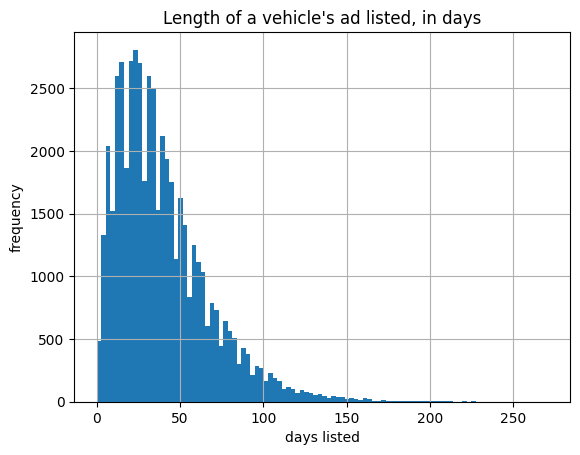

In [33]:
#Days_listed
df['days_listed'].hist(bins=100)
plt.title("Length of a vehicle's ad listed, in days")
plt.xlabel('days listed')
plt.ylabel('frequency');

In [34]:
print('{:0.2f}'.format(df['days_listed'].mean()))

39.56


In [35]:
print('{:0.2f}'.format(df['days_listed'].median()))

33.00


A lifetime of an ad in this dataset ranges from 0 up to around 250 days, the distribution is skewed towards large positive values. A typical ad is placed for around 30-40 days, so around 1 month.

Vehicles with higher values can be considered outliers - they are probably just inadequately priced and that's the reason they couldn't have been sold for a long time. We will identify the upper limit and remove these values in the next section.

Now let's have a look at the ads that were removed too quickly, meaning rows where days_listed is 0.

In [36]:
len(df[df['days_listed'] == 0])

54

In [37]:
df[df['days_listed'] == 0].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,brand,year_posted,month_posted,dow_posted,age_in_years
1246,14995,2008,chevrolet silverado 1500,excellent,8.0,gas,93300.0,automatic,truck,grey,1.0,2018-05-15,0,chevrolet,2018,5,1,10.368241
1709,59589,2019,chevrolet silverado 2500hd,excellent,8.0,diesel,132479.0,automatic,truck,white,1.0,2019-01-13,0,chevrolet,2019,1,6,0.032854
1981,14000,1999,ford f250,excellent,8.0,diesel,137500.0,automatic,truck,red,1.0,2018-09-27,0,ford,2018,9,3,19.737166
2879,4000,2004,ram 1500,excellent,8.0,gas,250000.0,automatic,truck,brown,1.0,2018-08-13,0,ram,2018,8,0,14.614648
3960,16750,1985,chevrolet corvette,like new,8.0,gas,24540.0,automatic,hatchback,white,NaN,2018-10-14,0,chevrolet,2018,10,6,33.782341


There are 54 ads of this type and there is no visible pattern or issue with them. However the fact that they were removed the same day as posted makes these observations suspicious. Maybe it was a technical error. We are going to replace them with the median value of a respective model and type group.

In [38]:
df.loc[df['days_listed'] == 0, 'days_listed'] = np.nan
df['days_listed'] = df.groupby(['model', 'type'])['days_listed'].transform(lambda x: x.fillna(x.median()))
df['days_listed'].isnull().sum()

0

Next, we'll plot a graph showing the dependence of the number of ads on the vehicle type and identify the two types with the greatest number of ads.

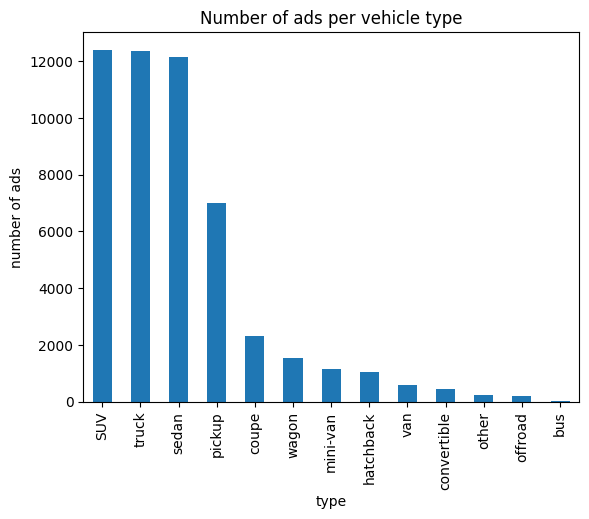

In [39]:
type_grouped = df.pivot_table(index='type', values='price', aggfunc=['count','mean'])
type_grouped['count'].sort_values(by='price', ascending=False).plot(kind='bar', legend=False)
plt.title('Number of ads per vehicle type')
plt.ylabel('number of ads');

From the bar plot above we see that 'SUV' and 'Sedan' are the two most popular types of vehicles in this data set. Let's subset our data frame based on these 2 types.


In [40]:
popular_types = df[df['type'].isin(['SUV', 'sedan'])]

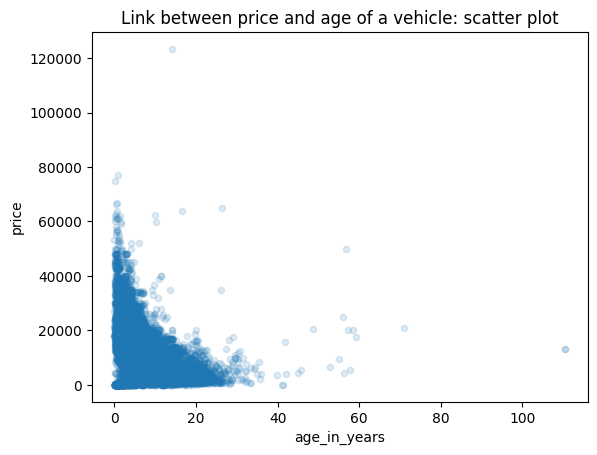

In [41]:
#Age vs price
popular_types.plot.scatter(x='age_in_years', y='price', alpha=.15)
plt.title('Link between price and age of a vehicle: scatter plot');

In this report we have analyzed different features of various types of vehicles in order to determine whether age, mileage, condition, transmission type, and color influence the ad of a vehicle.

First of all, we have familiarized ourselves with the data by performing the descriptive statistics. 

Next step was to deal with missing values:

Missing values in the is_4wd column were filled with 0 for those vehicles that do not have 4 weels;

Missing odometer values were filled with the median value of a respective group based on the model and type of a vehicle. 
We assumed that cars with the same model (e.g. cadillac escalade) but different types (e.g. SUV and pickup) have different odometer values;

Missing model_year values were filled based on the median number of years in exploitation of a respective group based on the model and type of a vehicle;

Missing cylinders values were filled with the median value of a respective group based on the model and type of a vehicle. 
We assumed that cars with the same model (e.g. cadillac escalade) but different types (e.g. SUV and pickup) have different number of cylinders because their engines were designed for different purposes;

Missing paint_color values were filled with a string 'missing' as it mostly depends on customer preferences and we don't have any additional information to fill in this column.


Lastly, we have analyzed what factors influenced the advertisement of a vehicle the most. We have conducted this analysis for the 2 most popular types of vehicles in terms of the number of ads (SUV and sedan). Based on our analysis, some of the predicted tendencies were correct while others were not:
Correct, on average, the older a vehicle, the lower the number of ad placed;
Correct, on average, the higher the price of a vehicle, the higher the days ad was placed;
Incorrect, there is no corelation  between type o f vehicle and no of days ad was placed
Incorrect, the higher the price , the higher the age of vehicle.